# 感知机

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [9]:
iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int)

clf = Perceptron()
clf.fit(X, y)

y_pred = clf.predict([[2, 0.5]])
print(y_pred)

[0]


# Sequential API - classify

In [12]:
import tensorflow as tf
from tensorflow import keras

d:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
d:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [24]:
fashin_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashin_mnist.load_data()
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


In [26]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 87us/sample - loss: 0.7152 - accuracy: 0.7677 - val_loss: 0.5245 - val_accuracy: 0.8184
Epoch 2/30
55000/55000 [==============================] - 4s 69us/sample - loss: 0.4854 - accuracy: 0.8323 - val_loss: 0.4519 - val_accuracy: 0.8436
Epoch 3/30
55000/55000 [==============================] - 4s 75us/sample - loss: 0.4393 - accuracy: 0.8479 - val_loss: 0.4695 - val_accuracy: 0.8354
Epoch 4/30
55000/55000 [==============================] - 4s 68us/sample - loss: 0.4132 - accuracy: 0.8552 - val_loss: 0.3969 - val_accuracy: 0.8660
Epoch 5/30
55000/55000 [==============================] - 4s 67us/sample - loss: 0.3935 - accuracy: 0.8621 - val_loss: 0.3752 - val_accuracy: 0.8696
Epoch 6/30
55000/55000 [==============================] - 4s 70us/sample - loss: 0.3775 - accuracy: 0.8676 - val_loss: 0.3684 - val_accuracy: 0.8728
Epoch 7/30
55000/55000 [==============================] -

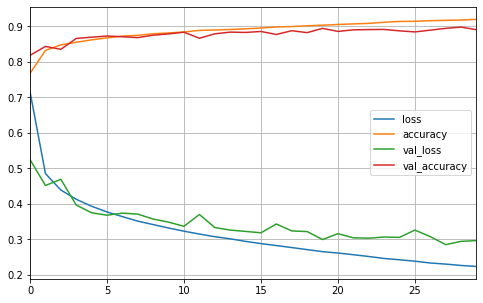

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [49]:
model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [43]:
X_new = X_test[:3]
y_proba = model.predict_proba(X_new)
print(y_proba.round(2))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [45]:
y_pred = model.predict_classes(X_new)
print(y_pred)

[9 2 1]


# Sequential API - Regression

In [46]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [47]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))



Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 83us/sample - loss: 1.5450 - val_loss: 0.6137
Epoch 2/20
11610/11610 [==============================] - 1s 46us/sample - loss: 0.5543 - val_loss: 0.5209
Epoch 3/20
11610/11610 [==============================] - 1s 45us/sample - loss: 0.4851 - val_loss: 0.4873
Epoch 4/20
11610/11610 [==============================] - 1s 47us/sample - loss: 0.4593 - val_loss: 0.4614
Epoch 5/20
11610/11610 [==============================] - 1s 47us/sample - loss: 0.4421 - val_loss: 0.4455
Epoch 6/20
11610/11610 [==============================] - 1s 47us/sample - loss: 0.4302 - val_loss: 0.4376
Epoch 7/20
11610/11610 [==============================] - 1s 48us/sample - loss: 0.4211 - val_loss: 0.4342
Epoch 8/20
11610/11610 [==============================] - 1s 44us/sample - loss: 0.4146 - val_loss: 0.4214
Epoch 9/20
11610/11610 [==============================] - 0s 43us/sample - loss: 0.4072 - val_l

In [50]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)
print(y_pred)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

# Functional API-Complex Models

In [52]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [53]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 102us/sample - loss: 1.9042 - val_loss: 0.8575
Epoch 2/20
11610/11610 [==============================] - 1s 62us/sample - loss: 0.7726 - val_loss: 0.7339
Epoch 3/20
11610/11610 [==============================] - 1s 58us/sample - loss: 0.6884 - val_loss: 0.6835
Epoch 4/20
11610/11610 [==============================] - 1s 56us/sample - loss: 0.6467 - val_loss: 0.6518
Epoch 5/20
11610/11610 [==============================] - 1s 52us/sample - loss: 0.6174 - val_loss: 0.6276
Epoch 6/20
11610/11610 [==============================] - 1s 57us/sample - loss: 0.5953 - val_loss: 0.6074
Epoch 7/20
11610/11610 [==============================] - 1s 52us/sample - loss: 0.5784 - val_loss: 0.5928
Epoch 8/20
11610/11610 [==============================] - 1s 53us/sample - loss: 0.5657 - val_loss: 0.5783
Epoch 9/20
11610/11610 [==============================] - 1s 62us/sample - loss: 0.5523 - val_

# Subclassing API to build Dynamic Model
....

# save and restore a Model

In [55]:
model.save("model.h5")
new_model = keras.models.load_model("model.h5")

# Callbacks

In [69]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_06_07-15_15_22'

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=2, restore_best_weights=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[early_stopping_cb, checkpoint_cb, tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 93us/sample - loss: 1.2001 - val_loss: 0.8724
Epoch 2/100
11610/11610 [==============================] - 1s 48us/sample - loss: nan - val_loss: nan
Epoch 3/100
 4160/11610 [=========>....................] - ETA: 0s - loss: nan

d:\Anaconda3\lib\site-packages\tensorflow_core\python\keras\callbacks.py:1225: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):
d:\Anaconda3\lib\site-packages\tensorflow_core\python\keras\callbacks.py:992: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current, self.best):


11610/11610 [==============================] - 1s 48us/sample - loss: nan - val_loss: nan
Epoch 4/100
11610/11610 [==============================] - 1s 49us/sample - loss: nan - val_loss: nan
Epoch 00004: early stopping
